# Classification with Neural Networks

**Neural networks** are a powerful set of machine learning algorithms. Neural network use one or more **hidden layers** of multiple **hidden units** to perform **function approximation**. The use of multiple hidden units in one or more layers, allows neural networks to approximate complex functions. Neural network models capable of approximating complex functions are said to have high **model capacity**. This property allows neural networks to solve complex machine learning problems. 

However, because of the large number of hidden units, neural networks have many **weights** or **parameters**. This situation often leads to **over-fitting** of neural network models, which limits generalization. Thus, finding optimal hyperparameters when fitting neural network models is essential for good performance. 

An additional issue with neural networks is **computational complexity**. Many optimization iterations are required. Each optimization iteration requires the update of a large number of parameters.  

## Example: Iris dataset

As a first example you will use neutral network models to classify the species of iris flowers using the famous iris dataset. 

As a first step, execute the code in the cell below to load the required packages to run the rest of this notebook. 

In [43]:
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr

%matplotlib inline

To get a feel for these data, you will now load and plot them. The code in the cell below does the following:

1. Loads the iris data as a Pandas data frame. 
2. Adds column names to the data frame.
3. Displays all 4 possible scatter plot views of the data. 

Execute this code and examine the results. 

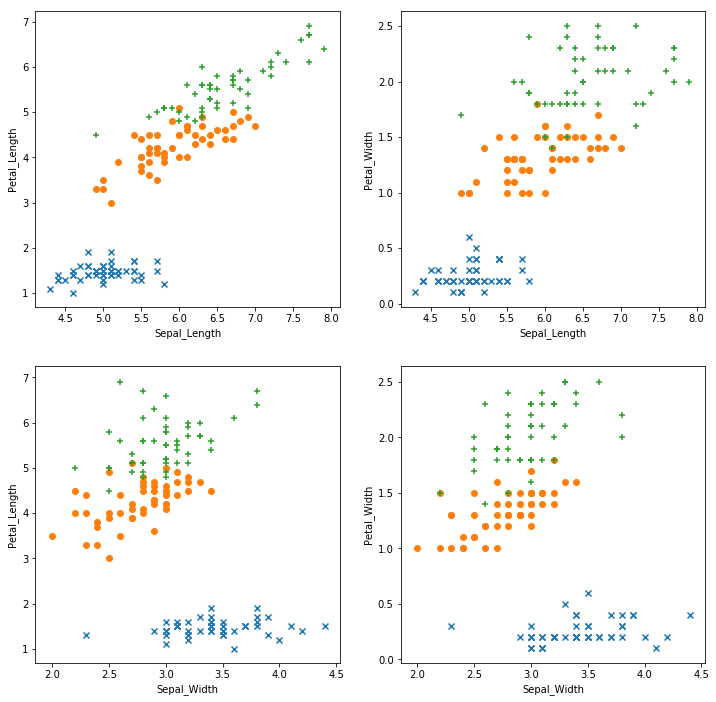

In [44]:
def plot_iris(iris):
    '''Function to plot iris data by type'''
    setosa = iris[iris['Species'] == 'setosa']
    versicolor = iris[iris['Species'] == 'versicolor']
    virginica = iris[iris['Species'] == 'virginica']
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    for i in range(2):
        for j in range(2):
            ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = 'x')
            ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = 'o')
            ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = '+')
            ax[i,j].set_xlabel(x_ax[i])
            ax[i,j].set_ylabel(y_ax[j])
            
## Import the dataset from sklearn.datasets
iris = datasets.load_iris()

## Create a data frame from the dictionary
species = [iris.target_names[x] for x in iris.target]
iris = pd.DataFrame(iris['data'], columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
iris['Species'] = species

## Plot views of the iris data            
plot_iris(iris) 

You can see that Setosa (in blue) is well separated from the other two categories. The Versicolor (in orange) and the Virginica (in green) show considerable overlap. The question is how well our classifier will seperate these categories. 

Scikit Learn classifiers require numerically coded numpy arrays for the features and as a label. The code in the cell below does the following processing:
1. Creates a numpy array of the features.
2. Numerically codes the label using a dictionary lookup, and converts it to a numpy array. 

Execute this code.

In [45]:
Features = np.array(iris[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])

levels = {'setosa':0, 'versicolor':1, 'virginica':2}
Labels =  np.array([levels[x] for x in iris['Species']])

Next, execute the code in the cell below to split the dataset into test and training set. Notice that unusually, 100 of the 150 cases are being used as the test dataset. 

In [46]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 100)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

As is always the case with machine learning, numeric features  must be scaled. The code in the cell below performs the following processing:

1. A Zscore scale object is defined using the `StandarScaler` function from the Scikit Learn preprocessing package. 
2. The scaler is fit to the training features. Subsequently, this scaler is used to apply the same scaling to the test data and in production. 
3. The training features are scaled using the `transform` method. 

Execute this code.

In [47]:
scale = preprocessing.StandardScaler()
scale.fit(X_train)
X_train = scale.transform(X_train)

Now you will define and fit a neural network model. The code in the cell below defines a single hidden layer neural network model with 50 units. The code uses the MLPClassifer function from the Scikit Lean neural_network package. The model is then fit. Execute this code.

In [48]:
nr.seed(1115)
nn_mod = MLPClassifier(hidden_layer_sizes = (50,))
nn_mod.fit(X_train, y_train)

C:\Users\EAZETNG\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Notice that the many neural network model object hyperparameters are displayed. Optimizing these parameters for a given situation can be quite time consuming. 

Next, the code in the cell below performs the following processing to score the test data subset:
1. The test features are scaled using the scaler computed for the training features. 
2. The `predict` method is used to compute the scores from the scaled features. 

Execute this code. 

In [49]:
X_test = scale.transform(X_test)
scores = nn_mod.predict(X_test)

It is time to evaluate the model results. Keep in mind that the problem has been made difficult deliberately, by having more test cases than training cases. 

The iris data has three species categories. Therefore it is necessary to use evaluation code for a three category problem. The function in the cell below extends code from pervious labs to deal with a three category problem. Execute this code and examine the results.

In [50]:
def print_metrics_3(labels, scores):
   
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score Setosa   Score Versicolor    Score Virginica')
    print('Actual Setosa      %6d' % conf[0,0] + '            %5d' % conf[0,1] + '             %5d' % conf[0,2])
    print('Actual Versicolor  %6d' % conf[1,0] + '            %5d' % conf[1,1] + '             %5d' % conf[1,2])
    print('Actual Vriginica   %6d' % conf[2,0] + '            %5d' % conf[2,1] + '             %5d' % conf[2,2])
    ## Now compute and display the accuracy and metrics
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    print(' ')
    print('          Setosa  Versicolor  Virginica')
    print('Num case   %0.2f' % metrics[3][0] + '     %0.2f' % metrics[3][1] + '      %0.2f' % metrics[3][2])
    print('Precision   %0.2f' % metrics[0][0] + '      %0.2f' % metrics[0][1] + '       %0.2f' % metrics[0][2])
    print('Recall      %0.2f' % metrics[1][0] + '      %0.2f' % metrics[1][1] + '       %0.2f' % metrics[1][2])
    print('F1          %0.2f' % metrics[2][0] + '      %0.2f' % metrics[2][1] + '       %0.2f' % metrics[2][2])
    
print_metrics_3(y_test, scores)   

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          34                1                 0
Actual Versicolor       0               26                 8
Actual Vriginica        0                1                30

Accuracy        0.90
 
          Setosa  Versicolor  Virginica
Num case   35.00     34.00      31.00
Precision   1.00      0.93       0.79
Recall      0.97      0.76       0.97
F1          0.99      0.84       0.87


Examine these results. Notice the following:
1. The confusion matrix has dimension 3X3. You can see that most cases are correctly classified. 
2. The overall accuracy is 0.88. Since the classes are roughly balanced, this metric indicates relatively good performance of the classifier, particularly since it was only trained on 50 cases. 
3. The precision, recall and  F1 for each of the classes is relatively good. Versicolor has the worst metrics since it has the largest number of misclassified cases. 

To get a better feel for what the classifier is doing, the code in the cell below displays a set of plots showing correctly (as '+') and incorrectly (as 'o') cases, with the species color-coded. Execute this code and examine the results. 

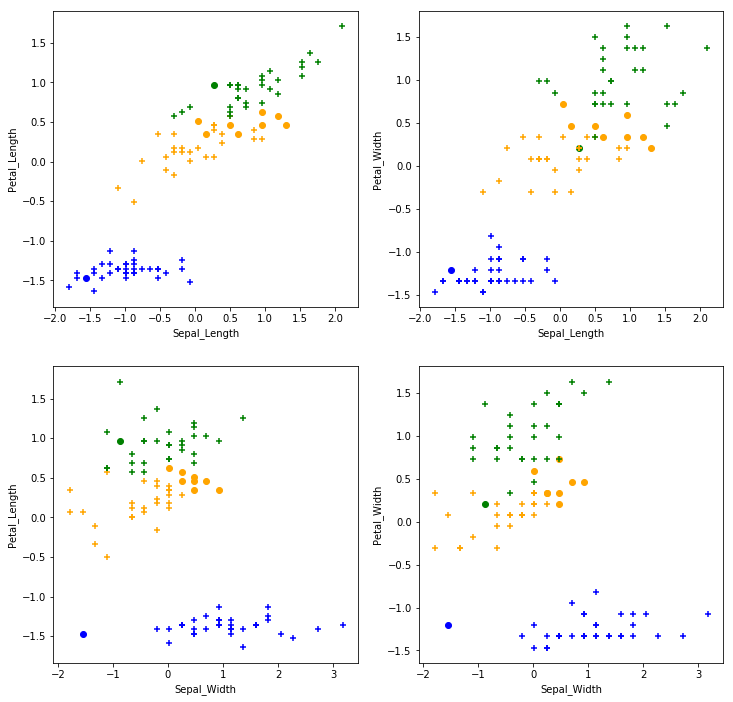

In [51]:
def plot_iris_score(iris, y_test, scores):
    '''Function to plot iris data by type'''
    ## Find correctly and incorrectly classified cases
    true = np.equal(scores, y_test).astype(int)
    
    ## Create data frame from the test data
    iris = pd.DataFrame(iris)
    levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    iris['Species'] = [levels[x] for x in y_test]
    iris.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Species']
    
    ## Set up for the plot
    fig, ax = plt.subplots(2, 2, figsize=(12,12))
    markers = ['o', '+']
    x_ax = ['Sepal_Length', 'Sepal_Width']
    y_ax = ['Petal_Length', 'Petal_Width']
    
    for t in range(2): # loop over correct and incorect classifications
        setosa = iris[(iris['Species'] == 'setosa') & (true == t)]
        versicolor = iris[(iris['Species'] == 'versicolor') & (true == t)]
        virginica = iris[(iris['Species'] == 'virginica') & (true == t)]
        # loop over all the dimensions
        for i in range(2):
            for j in range(2):
                ax[i,j].scatter(setosa[x_ax[i]], setosa[y_ax[j]], marker = markers[t], color = 'blue')
                ax[i,j].scatter(versicolor[x_ax[i]], versicolor[y_ax[j]], marker = markers[t], color = 'orange')
                ax[i,j].scatter(virginica[x_ax[i]], virginica[y_ax[j]], marker = markers[t], color = 'green')
                ax[i,j].set_xlabel(x_ax[i])
                ax[i,j].set_ylabel(y_ax[j])

plot_iris_score(X_test, y_test, scores)

Examine these plots. You can see how the classifier has divided the feature space between the classes. Notice that most of the errors occur in the overlap region between Virginica and Versicolor. This behavior is to be expected. There is an error in classifying Setosa which is a bit surprising, and which probably arises from the projection of the division between classes. 

Is it possible that a more complex neural network would separate these cases better? The more complex model should have greater model capacity, but will be more susceptible to over-fitting. The code in the cell below uses a neural network with 2 hidden layers and 100 units per layer, coded as (100,100). This model is fit with the training data and displays the evaluation of the model. 

Execute this code, and answer **Question 1** on the course page.

                 Confusion matrix
                 Score Setosa   Score Versicolor    Score Virginica
Actual Setosa          35                0                 0
Actual Versicolor       0               29                 5
Actual Vriginica        0                2                29

Accuracy        0.93
 
          Setosa  Versicolor  Virginica
Num case   35.00     34.00      31.00
Precision   1.00      0.94       0.85
Recall      1.00      0.85       0.94
F1          1.00      0.89       0.89


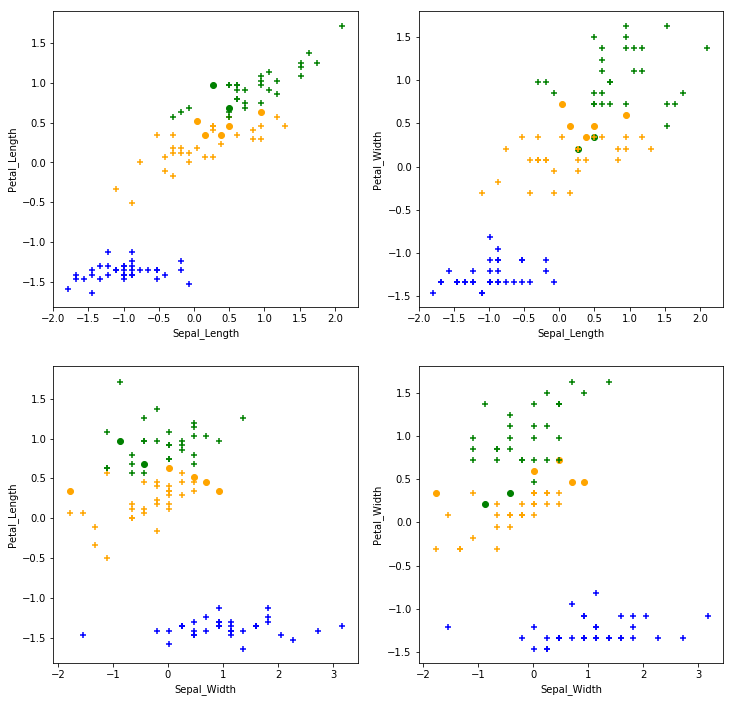

In [52]:
nr.seed(1115)
nn_mod = MLPClassifier(hidden_layer_sizes = (100,100),
                       max_iter=300)
nn_mod.fit(X_train, y_train)
scores = nn_mod.predict(X_test)
print_metrics_3(y_test, scores) 
plot_iris_score(X_test, y_test, scores)

These are remarkably good results. Apparently, adding additional model capacity allowed the neural network model to perform exceptionally well. There are only 7 misclassified cases, giving an overall accuracy of 0.93.  

## Another example

Now, you will try a more complex example using the credit scoring data. You will use the prepared data which had the following preprocessing:
1. Cleaning missing values.
2. Aggregating categories of certain categorical variables. 
3. Encoding categorical variables as binary dummy variables.
4. Standardizing numeric variables. 

Execute the code in the cell below to load the features and labels as numpy arrays for the example. 

In [53]:
Features = np.array(pd.read_csv('Credit_Features.csv'))
Labels = np.array(pd.read_csv('Credit_Labels.csv'))
Labels = Labels.reshape(Labels.shape[0],)
print(Features.shape)
print(Labels.shape)

(1000, 35)
(1000,)


Neural network training is known to be problematic when there is significant class imbalance. Unfortunately, neural networks have no method for weighting cases. Some alternatives are:
1. **Impute** new values using a statistical algorithm. 
2. **Undersample** the majority cases. For this method a number of the cases equal to the minority case are Bernoulli sampled from the majority case. 
3. **Oversample** the minority cases. For this method the number of minority cases are resampled until they equal the number of majority cases.

The code in the cell below oversamples the minority cases; bad credit customers. Execute this code to create a data set with balanced cases. 

In [54]:
temp_Labels = Labels[Labels == 1] 
temp_Features = Features[Labels == 1,:]
temp_Features = np.concatenate((Features, temp_Features), axis = 0)
temp_Labels = np.concatenate((Labels, temp_Labels), axis = 0) 

print(temp_Features.shape)
print(temp_Labels.shape)

(1300, 35)
(1300,)


Nested cross validation is used to estimate the optimal hyperparameters and perform model selection for a neural network model. 3 fold cross validation is used since training neural networks is computationally intensive. Additional folds would give better estimates but at the cost of greater computation time. Execute the code in the cell below to define inside and outside fold objects. 

In [55]:
nr.seed(123)
inside = ms.KFold(n_splits=3, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=3, shuffle = True)

The code in the cell below estimates the best hyperparameters using 3 fold cross validation. In the interest of computational efficiency, values for only 4 parameters will be searched. There are several points to note here:
1. In this case, a grid of four hyperparameters: 
  - **alpha** is the l2 regularization hyperparameter, 
  - **early_stopping** determines when the training metric becomes worse following an iteration of the optimization algorithm stops the training at the previous iteration. Early stopping is a powerful method to prevent over-fitting of machine learning models in general and neural networks in particular,
  - **beta_1** and **beta_2** are hyperparameters that control the adaptive learning rate used by the **Adam** optimizer,
3. The model is fit on the grid, and
4. The best estimated hyperparameters are printed. 

This code searches over a 3X3X3X2 or 54 element grid using 3 fold cross validation. Using even this modest search grid and number of folds requires the model to be trained 162 times. Execute this code and examine the result, but expect execution to take some time. 

Once you have executed the code, answer **Question 2** on the course page.

In [ ]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {#"alpha":[0.0000001,0.000001,0.00001], 
              #"early_stopping":[True, False], 
              "beta_1":[0.95,0.90,0.80], 
              "beta_2":[0.999,0.9,0.8]}

## Define the Neural Network model
nn_clf = MLPClassifier(hidden_layer_sizes = (100,100),
                       max_iter=300)

## Perform the grid search over the parameters
nr.seed(3456)
nn_clf = ms.GridSearchCV(estimator = nn_clf, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'recall',
                      return_train_score = True)

nr.seed(6677)
nn_clf.fit(temp_Features, temp_Labels)
#print(nn_clf.best_estimator_.alpha)
#print(nn_clf.best_estimator_.early_stopping)
print(nn_clf.best_estimator_.beta_1)
print(nn_clf.best_estimator_.beta_2)

Now, you will run the code in the cell below to perform the outer cross validation of the model. The multiple trainings of this model will take some time. 

In [27]:
nr.seed(498)
cv_estimate = ms.cross_val_score(nn_clf, temp_Features, temp_Labels, 
                                 cv = outside) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.877
SDT of the metric       = 0.003
Outcomes by cv fold
Fold  1    0.875
Fold  2    0.874
Fold  3    0.881


Examine these results. Notice that the standard deviation of the mean of Recall is an order of magnitude less than the mean itself. This indicates that this model is likely to generalize well, but the level of performance is still unclear. 

Now, you will build and test a model using the estimated optimal hyperparameters. However, there is a complication. The training data subset must have the minority case oversampled. Execute the code in the cell below to create training and testing dataset, with oversampled minority cases for the training subset.

In [35]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 300)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## Oversample the minority case for the training data
y_temp = y_train[y_train == 1] 
X_temp = X_train[y_train == 1,:]
X_train = np.concatenate((X_train, X_temp), axis = 0)
y_train = np.concatenate((y_train, y_temp), axis = 0) 

The code in the cell below defines a neural network model object using the estimated optimal model hyperparameters and then fits the model to the training data. Execute this code.

In [36]:
nr.seed(1115)
nn_mod = MLPClassifier(hidden_layer_sizes = (100,100), 
                       #alpha = nn_clf.best_estimator_.alpha, 
                       #early_stopping = nn_clf.best_estimator_.early_stopping, 
                       beta_1 = nn_clf.best_estimator_.beta_1, 
                       beta_2 = nn_clf.best_estimator_.beta_2,
                       max_iter = 300)
nn_mod.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.95,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

As expected, the hyperparameters of the  neural network model object reflect those specified. 

The code in the cell below scores and prints evaluation metrics for the model, using the test data subset. 

Execute this code, examine the results, and answer **Question 3** on the course page. 

In [37]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = nn_mod.predict_proba(X_test)
print_metrics(y_test, probabilities, 0.5)     

                 Confusion matrix
                 Score positive    Score negative
Actual positive       168                44
Actual negative        41                47

Accuracy        0.72
AUC             0.71
Macro precision 0.66
Macro recall    0.66
 
           Positive      Negative
Num case      212            88
Precision    0.80          0.52
Recall       0.79          0.53
F1           0.80          0.53


The performance of the neural network model is less than ideal. For the negative (bad credit) case the recall is perhaps adequate, but the precision is poor. Perhaps the oversampling does not help much in this case. Challenge yourself - try and perform the undersampling method and compare the result!

## Summary

In this lab you have accomplished the following:
1. Used neural models to classify the cases of the iris data. The model with greater capacity achieved significantly better results. 
2. Used 3 fold to find estimated optimal hyperparameters for a neural network model to classify credit risk cases. Oversampling of the minority case for the training data was required to deal with the class imbalance. Despite this approach, the results achieved are marginal at best. Perhaps, a model with greater capacity would achieve better results, or a different approach to dealing with class imbalance would be more successful.  